# Згорткові нейронні мережі (CNN)

**Згорткові нейронні мережі (CNN)** – це тип глибоких нейронних мереж, які спеціально розроблені для обробки даних, що мають сіткоподібну структуру, таких як зображення. Вони відрізняються від повністю зв'язаних мереж тим, що використовують згорткові шари, які виконують операцію згортки над вхідними даними. Це дозволяє їм ефективно виявляти локальні шаблони та ознаки на зображеннях, що робить їх ідеальним інструментом для вирішення задач комп'ютерного зору.

<img src="https://learnopencv.com/wp-content/uploads/2023/10/Convolutional-Neural-Network.png" width="700">

**Переваги CNN:**

- Ефективне виявлення локальних ознак: Згорткові шари здатні виявляти локальні шаблони, такі як краї, кути, текстури, незалежно від їх розташування на зображенні. Це досягається завдяки використанню фільтрів, які "ковзають" по зображенню та виявляють специфічні комбінації пікселів.
- Зменшення кількості параметрів: Завдяки спільним вагам у згорткових шарах, CNN мають значно меншу кількість параметрів порівняно з повністю зв'язаними мережами для обробки зображень. Це зменшує ризик перенавчання та прискорює навчання, оскільки модель має менше параметрів для оптимізації.
- Інваріантність до зсувів та поворотів: Завдяки операції пулінгу, яка зменшує розмірність карт ознак, CNN стають менш чутливими до невеликих зсувів та поворотів об'єктів на зображенні. Це робить їх більш стійкими до варіацій у положенні об'єктів на зображенні.

<img src="https://s.dou.ua/storage-files/image_494175945101713192607547.png" width="400">

**Приклади застосування CNN**:

- Розпізнавання образів:
 - Класифікація зображень (наприклад, розпізнавання котів та собак, визначення типу об'єкта на зображенні).
 - Виявлення об'єктів (наприклад, виявлення облич на фотографіях, визначення розташування об'єктів на зображенні).
- Обробка природної мови:
 - Аналіз тексту (наприклад, визначення тональності тексту, виявлення ключових слів).
 - Машинний переклад (наприклад, переклад тексту з однієї мови на іншу).
 - Генерація тексту (наприклад, створення описів до зображень).
- Медична діагностика:
 - Аналіз медичних зображень (наприклад, виявлення пухлин на рентгенівських знімках, класифікація клітин крові).

# Реалізація CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPool2D(strides=2),
    layers.Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'),
    layers.MaxPool2D(strides=2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 48)          │          38,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 48)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         307,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          21,588 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 369,174 (1.41 MB)

 Trainable params: 369,174 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

**Пояснення:**
- Conv2D: Згортковий шар, який застосовує фільтри до вхідних даних для виявлення локальних ознак.
- Параметри: кількість фільтрів (32, 64), розмір фільтра (3x3), функція активації (ReLU).
- Функція активації ReLU: $f(x) = max(0, x)$ - вводить нелінійність в модель, дозволяючи їй вивчати складніші залежності в даних.
- MaxPooling2D: Шар пулінгу, який зменшує розмірність карт ознак, зберігаючи при цьому найважливішу інформацію (максимальне значення в кожному вікні).
- Flatten: Шар, який перетворює багатовимірні карти ознак у одновимірний вектор. Це необхідно для подальшого використання повністю зв'язаних шарів.
- Dense: Повністю зв'язаний шар, який використовується для класифікації.
Параметри: кількість нейронів (10), функція активації (softmax).
- Функція активації Softmax: $σ(z)i = \frac{e^{z_i}}{\sum{j=1}^K e^{z_j}}$ - перетворює вихід мережі на ймовірності приналежності до кожного з 10 класів.

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - accuracy: 0.6360 - loss: 1.0639 - val_accuracy: 0.8248 - val_loss: 0.4873
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8423 - loss: 0.4392 - val_accuracy: 0.8619 - val_loss: 0.3905
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8707 - loss: 0.3617 - val_accuracy: 0.8739 - val_loss: 0.3518
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8872 - loss: 0.3182 - val_accuracy: 0.8838 - val_loss: 0.3287
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8965 - loss: 0.2937 - val_accuracy: 0.8824 - val_loss: 0.3232
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9006 - loss: 0.2708 - val_accuracy: 0.8962 - val_loss: 0.2898
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9083 - loss: 0.2509 - val_accuracy: 0.9010 - val_loss: 0.2787
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9168 - loss: 0.2281 - val_ac

# 1x1 згортка

**Принцип роботи:**

1x1 згортка – це згортковий шар з фільтром розміром 1x1. Вона виконує лінійну комбінацію каналів вхідних даних, що дозволяє:

* **Зменшити кількість каналів:**  1x1 згортка може бути використана для зменшення кількості каналів у карті ознак, що зменшує кількість параметрів мережі та прискорює її роботу.
* **Збільшити нелінійність:**  1x1 згортка може бути використана для додавання нелінійності в мережу шляхом застосування функції активації (наприклад, ReLU) до результату лінійної комбінації каналів.
* **Покращити ефективність мережі:**  1x1 згортка може бути використана для агрегації інформації з різних каналів, що може покращити ефективність мережі.

**Використання:**

* Зменшення кількості фільтрів.
* Збільшення нелінійності.
* Покращення ефективності мережі.


<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*dNaikOfrGzUaJ2EzRIl4tw.png" width="700">

In [ ]:
# ... (попередні шари)

x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.Conv2D(32, (1, 1), activation='relu')(x) # 1x1 згортка для зменшення кількості каналів

# ... (наступні шари)

# Image augmentation

**Аугментація даних** – це техніка, яка використовується для штучного збільшення розміру навчального набору даних шляхом створення модифікованих версій існуючих зображень. Це допомагає покращити продуктивність та стійкість моделей машинного навчання, особливо коли обсяг доступних даних обмежений.

<img src="https://albumentations.ai/docs/images/introduction/image_augmentation/augmentation.jpg" width="700">

**Приклади:**

* **Поворот:** Поворот зображення на певний кут.
* **Масштабування:** Зміна розміру зображення.
* **Зсув:** Зсув зображення по горизонталі або вертикалі.
* **Дзеркальне відображення:** Відображення зображення по горизонталі або вертикалі.
* **Зміна яскравості та контрастності:** Зміна яскравості та контрастності зображення.
* **Додавання шуму:** Додавання випадкового шуму до зображення.

**Переваги:**

* **Збільшення розміру навчальної вибірки:** Data augmentation дозволяє створити більше різноманітних зображень для навчання моделі, що покращує її узагальнюючу здатність.
* **Зменшення ризику перенавчання:** Data augmentation запобігає перенавчанню, оскільки модель навчається на більш різноманітних даних.
* **Покращення точності:** Data augmentation може покращити точність моделі, особливо коли розмір навчальної вибірки обмежений.

**Недоліки:**

* **Обчислювальна складність:** Data augmentation може збільшити час навчання моделі, оскільки необхідно генерувати додаткові зображення.
* **Необхідність налаштування параметрів:** Data augmentation потребує налаштування параметрів перетворень, таких як кут повороту, коефіцієнт масштабування тощо.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Створення генератора аугментації
datagen = ImageDataGenerator(
    rotation_range=20,          # Випадковий поворот до 20 градусів
    width_shift_range=0.2,      # Випадковий зсув по ширині до 20%
    height_shift_range=0.2,     # Випадковий зсув по висоті до 20%
    shear_range=0.2,           # Випадкове зсувне перетворення до 20%
    zoom_range=0.2,            # Випадкове масштабування до 20%
    horizontal_flip=True,       # Випадкове горизонтальне перевертання
    fill_mode='nearest'         # Заповнення пікселів, що виходять за межі зображення, найближчим значенням
)

# Завантаження даних Fashion MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Розширення розмірності зображень для роботи з ImageDataGenerator
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Нормалізація пікселів
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Застосування аугментації до навчальних даних
train_generator = datagen.flow(x_train, y_train, batch_size=256)

У цьому прикладі ми створюємо генератор datagen, який застосовує різні перетворення до зображень Fashion MNIST, такі як поворот, зсув, зсувне перетворення, масштабування та горизонтальне перевертання.

Потім ми використовуємо метод flow для створення генератора train_generator, який буде видавати аугментовані зображення та їх мітки під час навчання моделі.

In [ ]:
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPool2D(strides=2),
    layers.Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'),
    layers.MaxPool2D(strides=2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(train_generator, epochs=10)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 100ms/step - accuracy: 0.5070 - loss: 1.3366
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.7045 - loss: 0.7823
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 107ms/step - accuracy: 0.7371 - loss: 0.6982
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - accuracy: 0.7646 - loss: 0.6325
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.7799 - loss: 0.5857
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.7891 - loss: 0.5637
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 104ms/step - accuracy: 0.7957 - loss: 0.5486
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 102ms/step - accuracy: 0.8043 - loss: 0.5262
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 103ms/step - accuracy: 0.8129 - loss: 0.5009
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.8178 - loss: 0.4885
Test loss: 0.446986585855484
Test accuracy: 0.8343999981880188


# Базові архітектури CNN

## LeNet-5

**LeNet** – одна з перших успішних CNN, розроблена Яном Лекуном у 1998 році. Вона була створена для розпізнавання рукописних цифр та використовувалася банками для обробки чеків.

**Архітектура LeNet:**

* Два згорткових шари з 6 та 16 фільтрами відповідно.
* Два шари пулінгу.
* Три повністю зв'язаних шари з 120, 84 та 10 нейронами відповідно.


LeNet продемонструвала ефективність CNN для розпізнавання образів та стала основою для розвитку багатьох наступних архітектур. Вона показала, що CNN здатні вивчати складні ієрархічні представлення даних, що дозволяє їм досягати високої точності в задачах розпізнавання образів.

<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*fDvp2DDqNMPEUkmp6kijJw.jpeg" width="700">

In [ ]:
model = tf.keras.Sequential()

# C1 Convolution Layer
model.add(layers.Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh', input_shape=(28, 28, 1)))

# S2 SubSampling Layer
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

# C3 Convolution Layer
model.add(layers.Conv2D(filters=16, strides=(1,1), kernel_size=(5,5), activation='tanh'))

# S4 SubSampling Layer
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

# Flatten the output so that we can connect it with the fully connected layers by converting it into a 1D Array
model.add(layers.Flatten())


# C5 Fully Connected Layer
model.add(layers.Dense(units=120, activation='tanh'))

# FC6 Fully Connected Layers
model.add(layers.Dense(units=84, activation='tanh'))

# Output Layer
model.add(layers.Dense(units=10, activation='softmax'))

* AveragePooling2D: Шар пулінгу, який зменшує розмірність карт ознак, усереднюючи інформацію (середнє значення в кожному вікні).

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*fXxDBsJ96FKEtMOa9vNgjA.gif" width="700">

In [ ]:
# Compile the Model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,854 (347.09 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,428 (173.55 KB)

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.5985 - loss: 1.1729 - val_accuracy: 0.7340 - val_loss: 0.7035
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7777 - loss: 0.5988 - val_accuracy: 0.7619 - val_loss: 0.6047
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8066 - loss: 0.5265 - val_accuracy: 0.7902 - val_loss: 0.5577
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8256 - loss: 0.4783 - val_accuracy: 0.7974 - val_loss: 0.5405
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8372 - loss: 0.4496 - val_accuracy: 0.8323 - val_loss: 0.4701
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8468 - loss: 0.4211 - val_accuracy: 0.8422 - val_loss: 0.4402
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8546 - loss: 0.4016 - val_accuracy: 0.8308 - val_loss: 0.4584
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8600 - loss: 0.3857 - val_accuracy: 0

## AlexNet

**AlexNet** – CNN, яка перемогла в конкурсі ImageNet Large Scale Visual Recognition Challenge (ILSVRC) у 2012 році, значно покращивши точність розпізнавання образів. Ця перемога стала переломним моментом у розвитку глибокого навчання, продемонструвавши його потенціал для вирішення складних задач комп'ютерного зору.

Архітектура AlexNet:

- П'ять згорткових шарів з 96, 256, 384, 384 та 256 фільтрами відповідно.
- Три шари пулінгу.
- Три повністю зв'язаних шари з 4096, 4096 та 1000 нейронами відповідно.

<img src="https://neurohive.io/wp-content/uploads/2018/10/AlexNet-1.png" width="1000">

**Ключові нововведення:**

* **ReLU як функція активації:**  ReLU (Rectified Linear Unit) -  $f(x) = max(0, x)$ - пришвидшує навчання мережі порівняно з традиційними функціями активації, такими як sigmoid та tanh.
* **Dropout для регуляризації:** Dropout – це метод регуляризації, який випадковим чином "вимикає" нейрони під час навчання, що запобігає перенавчанню та покращує узагальнюючу здатність моделі.
* **Data augmentation для збільшення розміру навчальної вибірки:** Data augmentation – це метод штучного збільшення розміру навчальної вибірки шляхом застосування різних перетворень до існуючих зображень (поворот, масштабування, зсув тощо).

https://www.kaggle.com/datasets/haesunpark/oxflower17/data?select=oxflower17.npz

In [ ]:
import numpy as np

data = np.load('/content/drive/MyDrive/Lectures/oxflower17.npz')
X, Y = data['X'], data['Y']
X.shape, Y.shape

((1360, 224, 224, 3), (1360, 17))

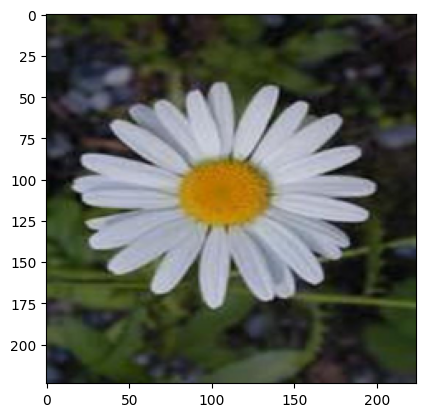

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[0])

In [ ]:
model = keras.Sequential()

model.add(layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(256, kernel_size=(5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='relu'))
model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='tanh'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(17, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Batch Normalization (Batch Norm)** надзвичайно важливий у сучасному глибокому навчанні.

Batch Norm - це шар, який стабілізує мережу під час навчання, прискорюючи збіжність та дозволяючи створювати глибші мережі.

**Основні пункти статті:**

1. **Нормалізація вхідних даних:**
    * Стандартною практикою є нормалізація вхідних даних до нульового середнього значення та одиничної дисперсії.
    * Це робиться для того, щоб всі ознаки були в одному масштабі, що покращує збіжність градієнтного спуску.
    
    <img src="https://miro.medium.com/v2/resize:fit:1040/format:webp/0*k-04EQd3QOrGrXfd.png" width="700">
2. **Необхідність Batch Norm:**
    * Активації з попереднього шару є входами для наступного шару.
    * Тому, як і вхідні дані, активації кожного прихованого шару також потребують нормалізації.
    <img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/0*7x11OwxQZBlOQp8l.png" width="700">
3. **Принцип роботи Batch Norm:**
    * Batch Norm - це шар, який вставляється між прихованими шарами.
    * Він нормалізує виходи попереднього шару перед передачею їх на вхід наступного шару.


`layers.BatchNormalization` - це шар Keras, який реалізує Batch Normalization. Він нормалізує активації попереднього шару шляхом віднімання середнього значення по пакету (batch) та ділення на стандартне відхилення по пакету. Це допомагає стабілізувати навчання мережі та прискорити її збіжність.


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 22, 22, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 10, 10, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 6, 6, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 4, 4, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 1, 1, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1, 1, 384)           │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 4096)                │       1,576,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 17)                  │          69,649 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,883,153 (83.48 MB)

 Trainable params: 21,881,681 (83.47 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, batch_size=64, epochs=100, verbose=1, validation_split=0.1, shuffle=True)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 512ms/step - accuracy: 0.2039 - loss: 4.2075 - val_accuracy: 0.0441 - val_loss: 7.1327
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.2913 - loss: 3.4550 - val_accuracy: 0.0882 - val_loss: 4.8873
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.3846 - loss: 2.5771 - val_accuracy: 0.1618 - val_loss: 4.9866
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.4256 - loss: 2.1436 - val_accuracy: 0.2132 - val_loss: 5.1495
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.3972 - loss: 2.2058 - val_accuracy: 0.1544 - val_loss: 5.7271
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.3917 - loss: 2.3693 - val_accuracy: 0.2353 - val_loss: 4.5913
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.4524 - loss: 2.1732 - val_accuracy: 0.2574 - val_loss: 3.6585
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.4622 - loss: 2.0528 - val_accuracy: 

# Сучасні архітектури CNN

## VGG-16

**VGG16** – це CNN, розроблена в Оксфордському університеті в 2014 році. Вона отримала свою назву від Visual Geometry Group (VGG), яка розробила цю архітектуру. VGG16 досягла високих результатів в конкурсі ILSVRC 2014, зайнявши друге місце в задачі класифікації зображень.



**Архітектура VGG16:**

VGG16 має просту та елегантну архітектуру, яка складається з 16 шарів (13 згорткових шарів, 3 повністю зв'язаних шари та шар softmax). Вона використовує лише згорткові шари з фільтрами розміром 3x3 та шари пулінгу з розміром вікна 2x2.

**Схема архітектури VGG16:**

<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*ZqkQYVB3_Gw0hjrAMzi6_A.png" width="700">


<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Q_bg1E3trWcjdk9_jnVGwg.png" width="700">



**Ключові особливості:**

* **Використання малих фільтрів:** VGG16 використовує лише згорткові шари з фільтрами розміром 3x3. Це дозволяє зменшити кількість параметрів мережі та покращити її ефективність.
* **Збільшення глибини мережі:** VGG16 має 16 шарів, що значно більше, ніж у попередніх CNN. Збільшення глибини мережі дозволяє їй вивчати складніші ієрархічні представлення даних.
* **Використання ReLU:** VGG16 використовує ReLU як функцію активації, що пришвидшує навчання мережі.

**Переваги:**

* **Простота:** VGG16 має просту та елегантну архітектуру, що робить її легкою для розуміння та реалізації.
* **Ефективність:** VGG16 досягає високої точності в багатьох задачах комп'ютерного зору, таких як класифікація зображень, виявлення об'єктів та сегментація зображень.
* **Наявність попередньо навчених моделей:** VGG16 має попередньо навчені моделі, які можна використовувати для вирішення різних задач без необхідності навчання з нуля.

**Недоліки:**

* **Велика кількість параметрів:** VGG16 має велику кількість параметрів (близько 138 мільйонів), що може призвести до збільшення часу навчання та використання пам'яті.
* **Повільне навчання:** VGG16 може навчатися повільно, особливо на великих наборах даних.

In [ ]:
from tensorflow.keras.applications import VGG16

# Завантаження попередньо навченої моделі VGG16 (без верхніх шарів)
vgg16_model = VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
import numpy as np
from PIL import Image
import requests
from io import BytesIO

# Завантаження зображення з URL
url = 'https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Зміна розміру зображення до розміру, який очікує модель
img = img.resize((224, 224))

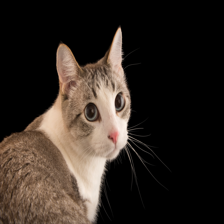

In [ ]:
img

In [ ]:
# Перетворення зображення в масив numpy
img_array = np.array(img)

# Додавання додаткового виміру для пакетної обробки
img_array = np.expand_dims(img_array, axis=0)

# Нормалізація пікселів
img_array = tf.keras.applications.vgg16.preprocess_input(img_array)

In [ ]:
# Прогнозування
predictions = vgg16_model.predict(img_array)

# Отримання класу з найвищою ймовірністю
predicted_class = tf.keras.applications.vgg16.decode_predictions(predictions, top=5)

print(f'Predicted class: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted class: [[('n02124075', 'Egyptian_cat', 0.774301), ('n02123045', 'tabby', 0.1096384), ('n02123159', 'tiger_cat', 0.043625455), ('n02127052', 'lynx', 0.010971569), ('n02971356', 'carton', 0.008691478)]]


**Приклади застосування VGG16:**

* **Класифікація зображень:** VGG16 може бути використана для класифікації зображень, наприклад, для розпізнавання об'єктів на фотографіях.
* **Виявлення об'єктів:** VGG16 може бути використана як основа для алгоритмів виявлення об'єктів, таких як Faster R-CNN.
* **Сегментація зображень:** VGG16 може бути використана як основа для алгоритмів сегментації зображень, таких як U-Net.


### Виділення ознак

**Виділення ознак** - це метод використання попередньо навченої моделі (в даному випадку VGG16) для вилучення ознак з нових даних. Замість того, щоб навчати всю модель з нуля, ми використовуємо вже навчені шари VGG16 для виявлення ознак на зображеннях Fashion MNIST. Потім ці ознаки використовуються для навчання нового класифікатора, який буде спеціалізований для датасету Fashion MNIST.

Переваги виділення ознак:

- Пришвидшення навчання: Використання попередньо навчених ознак дозволяє значно пришвидшити навчання нового класифікатора, оскільки модель вже "знає" багато загальних ознак зображень.
- Покращення точності: Попередньо навчені ознаки можуть бути більш інформативними, ніж ознаки, виявлені моделлю, навченою з нуля, що може покращити точність класифікації.

<img src="https://skyengine.ai/se/images/blog/transfer_learning.jpeg" width="700">

<img src="https://www.researchgate.net/publication/342400905/figure/fig4/AS:905786289057792@1592967688003/The-architecture-of-our-transfer-learning-model.jpg" width="1000">

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
X = np.concatenate((x_train, x_test), axis=0)
Y = np.concatenate((y_train, y_test), axis=0)

X.shape, Y.shape

((70000, 28, 28), (70000,))

In [ ]:
# Завантаження попередньо навченої моделі VGG16
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Зверніть увагу: Fashion MNIST має зображення розміром 28x28,
# тому ми повинні змінити розмір вхідних даних та використовувати upsampling.

In [ ]:
X_resized = []
for image in X:
  image = Image.fromarray(image)
  image = image.resize((32, 32))
  image = np.array(image)
  X_resized.append(image)

X_resized = np.array(X_resized)

# Add a third channel to the images
X_resized = np.repeat(X_resized[..., np.newaxis], 3, -1)

# Preprocess the images
X_prepared = tf.keras.applications.vgg16.preprocess_input(X_resized)
Y_prepared = tf.keras.utils.to_categorical(Y, num_classes=10)

In [ ]:
# Заморожування шарів VGG16
base_model.trainable = False

In [ ]:
# Створення нового класифікатора

from tensorflow.keras import layers, models

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Компіляція та навчання моделі

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_prepared, Y_prepared, epochs=10)

Epoch 1/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.6798 - loss: 2.5322
Epoch 2/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - accuracy: 0.7869 - loss: 0.5914
Epoch 3/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8016 - loss: 0.5472
Epoch 4/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8164 - loss: 0.5163
Epoch 5/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8177 - loss: 0.5090
Epoch 6/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8233 - loss: 0.4915
Epoch 7/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8255 - loss: 0.4903
Epoch 8/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8293 - loss: 0.4652
Epoch 9/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8329 - loss: 0.4657
Epoch 10/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8326 - loss: 0.4667


### Дотренування

**Дотренування** - це метод донавчання попередньо навченої моделі на новому наборі даних. Замість того, щоб заморожувати всі шари попередньо навченої моделі, ми "розморожуємо" деякі з верхніх шарів та навчаємо їх разом з новим класифікатором. Це дозволяє моделі адаптуватися до специфіки нового датасету та покращити точність класифікації.

**Переваги дотренування:**

* **Подальше покращення точності:**  Дотренування дозволяє моделі ще краще адаптуватися до нового датасету та покращити точність класифікації.
* **Використання знань з попереднього навчання:**  Дотренування дозволяє моделі використовувати знання, отримані під час навчання на великому наборі даних (ImageNet), для вирішення нової задачі.

<img src="https://miro.medium.com/v2/resize:fit:1200/1*e5E3fvxUgFP7LBRxx_9HRw.png" width="700">

**Реалізація дотренування з VGG16 на Fashion MNIST:**

1. Завантаження та заморожування більшості шарів VGG16.

2. Розморожування деяких верхніх шарів VGG16.

3. Створення нового класифікатора.

4. Компіляція та навчання моделі з низькою швидкістю навчання.


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
X = np.concatenate((x_train, x_test), axis=0)
Y = np.concatenate((y_train, y_test), axis=0)

X.shape, Y.shape

((70000, 28, 28), (70000,))

In [ ]:
# Завантаження попередньо навченої моделі VGG16
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Зверніть увагу: Fashion MNIST має зображення розміром 28x28,
# тому ми повинні змінити розмір вхідних даних та використовувати upsampling.

In [ ]:
X_resized = []
for image in X:
  image = Image.fromarray(image)
  image = image.resize((32, 32))
  image = np.array(image)
  X_resized.append(image)

X_resized = np.array(X_resized)

# Add a third channel to the images
X_resized = np.repeat(X_resized[..., np.newaxis], 3, -1)

# Preprocess the images
X_prepared = tf.keras.applications.vgg16.preprocess_input(X_resized)
Y_prepared = tf.keras.utils.to_categorical(Y, num_classes=10)

In [ ]:
# Заморожування шарів VGG16
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
base_model.layers

[<InputLayer name=input_layer_9, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [ ]:
# Розморожування деяких верхніх шарів VGG16

for layer in base_model.layers[-4:]:
    layer.trainable = True

In [ ]:
# Створення нового класифікатора

from tensorflow.keras import layers, models

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Компіляція та навчання моделі

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_prepared, Y_prepared, epochs=10)

Epoch 1/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 72s 30ms/step - accuracy: 0.0992 - loss: 2.8284
Epoch 2/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 62s 29ms/step - accuracy: 0.1022 - loss: 2.3027
Epoch 3/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.0965 - loss: 2.3029
Epoch 4/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.0977 - loss: 2.3028
Epoch 5/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.0995 - loss: 2.3027
Epoch 6/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.1017 - loss: 2.3027
Epoch 7/10
 591/2188 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.1010 - loss: 2.3028

KeyboardInterrupt: 

Для досягнення максимально можливої точності класифікації можна експериментувати з різними параметрами мережі, такими як:

* Кількість шарів у новому класифікаторі.
* Кількість нейронів у шарах.
* Функції активації.
* Методи регуляризації (dropout, batch normalization).
* Оптимізатор та його параметри (швидкість навчання, momentum).
* Кількість епох навчання.

**Важливо:**

* **Upsampling/resizing зображень:**  Зображення Fashion MNIST мають розмір 28x28, тоді як VGG16 навчена на зображеннях розміром 224x224. Тому необхідно змінити розмір зображень Fashion MNIST або використовувати upsampling перед подачею їх на вхід VGG16.
* **Data augmentation:**  Використання data augmentation може покращити точність класифікації, особливо коли розмір навчальної вибірки обмежений.






## DenseNet

**DenseNet** – це CNN, яка була запропонована в 2017 році. Вона заснована на ідеї щільних з'єднань між шарами, що дозволяє покращити потік інформації та градієнтів у мережі.

**Концепція щільних з'єднань:**

У DenseNet вихід кожного шару передається на вхід всіх наступних шарів. Це створює "щільний блок", в якому кожен шар має доступ до ознак, виявлених всіма попередніми шарами.



Схематичне зображення одного блоку DenseNet:
<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*rmHdoPjGUjRek6ozH7altw.png" width="700">

Схематичне зображення архітектури DenseNet:
<img src="https://editor.analyticsvidhya.com/uploads/254293.png" width="1000">

Each layer is receiving a “collective knowledge” from all preceding layers.

**Переваги:**

* **Покращення потоку градієнтів:** Щільні з'єднання дозволяють градієнту поширюватися безпосередньо від вихідного шару до всіх попередніх шарів, що запобігає його зникненню та пришвидшує навчання.
* **Ефективніше використання ознак:** Кожен шар має доступ до ознак, виявлених всіма попередніми шарами, що дозволяє йому використовувати цю інформацію для більш ефективного навчання.
* **Зменшення ризику перенавчання:** Щільні з'єднання діють як форма регуляризації, що запобігає перенавчанню та покращує узагальнюючу здатність моделі.

**Недоліки:**

* **Висока обчислювальна складність:** Щільні з'єднання збільшують кількість обчислень, необхідних для навчання та використання мережі.
* **Велика кількість пам'яті:** Щільні з'єднання потребують зберігання виходів всіх попередніх шарів, що може призвести до великої кількості використовуваної пам'яті.


In [ ]:
from tensorflow.keras.applications import DenseNet121

# Завантаження попередньо навченої моделі DenseNet121
dense_net_model = DenseNet121(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

33188688/33188688 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Dense Block with 4 Layers:

<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*kUjULgagudNwFgZcX4hCAQ.png" width="700">

https://github.com/keras-team/keras/blob/v3.5.0/keras/src/applications/densenet.py#L327

In [ ]:
layers_in_dense_block = 2
output_ff_layers = 5

((6 + 12 + 24 + 16) * layers_in_dense_block) + output_ff_layers

121

In [ ]:
dense_net_model.summary()

Model: "densenet121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 230, 230, 3)    │              0 │ input_layer_11[0][0]   │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 8,062,504 (30.76 MB)

 Trainable params: 7,978,856 (30.44 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [ ]:
# Перетворення зображення в масив numpy
img_array = np.array(img)

# Додавання додаткового виміру для пакетної обробки
img_array = np.expand_dims(img_array, axis=0)

# Нормалізація пікселів
img_array = tf.keras.applications.densenet.preprocess_input(img_array)

In [ ]:
# Прогнозування
predictions = dense_net_model.predict(img_array)

# Отримання класу з найвищою ймовірністю
predicted_class = tf.keras.applications.densenet.decode_predictions(predictions, top=5)

print(f'Predicted class: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class: [[('n02124075', 'Egyptian_cat', 0.6591704), ('n02123045', 'tabby', 0.16376767), ('n02123159', 'tiger_cat', 0.045503452), ('n02127052', 'lynx', 0.0133741945), ('n03958227', 'plastic_bag', 0.0126451105)]]


## ResNet

**Проблема зникнення градієнта:**

У глибоких нейронних мережах градієнт може зменшуватися експоненційно під час зворотного поширення, що ускладнює навчання глибоких шарів. Це відбувається тому, що під час зворотного поширення градієнт множиться на похідні функцій активації на кожному шарі. Якщо ці похідні менші за одиницю, то градієнт буде зменшуватися з кожним шаром, що може призвести до його зникнення.

**Концепція залишкових з'єднань (skip connections):**

Залишкове з'єднання – це пряме з'єднання між входом та виходом шару або блоку шарів. Це дозволяє градієнту "перестрибнути" через шари, запобігаючи його зникненню. Залишкове з'єднання додає вхід шару до його виходу, що дозволяє мережі легше вивчати "залишкову" (residual) інформацію, яка не була виявлена попередніми шарами.

ResNet Concept:

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*4wx7szWCBse9-7eemGQJSw.png" width="700">

<img src="https://cdn.prod.website-files.com/645cec60ffb18d5ebb37da4b/656601864cbe643461bdefb2_skip_connection%20(1).jpg" width="700">

The residual connection creates a shortcut path by adding the value at the beginning of the block, x, directly to the end of the block $(F(x) + x)$.

**Архітектура ResNet:**

ResNet використовує залишкові блоки, які складаються з декількох згорткових шарів та залишкового з'єднання. Залишковий блок може бути представлений наступним чином:

```
x -> [Conv2D -> BatchNormalization -> ReLU] * n -> Conv2D -> BatchNormalization -> Add(x) -> ReLU
```

34-layer ResNet model:

<img src="https://cdn.prod.website-files.com/645cec60ffb18d5ebb37da4b/656601ce58181758faf9c90f_resnet_34.jpg" width="1000">

**Загальний дизайн архітектури**

- Початкова згортка: Мережа починається з одного згорткового шару 7x7 з кроком 2, за яким слідує пакетна нормалізація та функція активації ReLU. Після цієї початкової згортки застосовується операція максимального пулінгу.
- Набір блоків: Після початкової настройки мережа розділена на чотири основні етапи, кожен з яких містить серію залишкових блоків. Кількість блоків варіюється залежно від конкретної конфігурації ResNet (34, 50, 101, 152). Розмір карт ознак зменшується вдвічі на кожному етапі, тоді як кількість фільтрів подвоюється, щоб зберегти часову складність на шар.
- Глобальний усереднений пулінг та повністю зв'язаний (FC) шар: Мережа завершується шаром глобального усередненого пулінгу, за яким слідує повністю зв'язаний шар з 1000 виходами, що відповідає 1000 класам ImageNet. Функція активації softmax застосовується для виведення розподілу ймовірностей по класах.

<img src="https://cdn.prod.website-files.com/645cec60ffb18d5ebb37da4b/65eb303c9ee4b67135628e9a_archi.jpg" width="1000">

**Переваги:**

* **Можливість навчання дуже глибоких мереж:** Залишкові з'єднання дозволяють тренувати дуже глибокі мережі (навіть більше 1000 шарів), які раніше були неможливі через проблему зникнення градієнта.
* **Покращення точності:** ResNet досягає високої точності в багатьох задачах комп'ютерного зору, таких як класифікація зображень, виявлення об'єктів та сегментація зображень.
* **Пришвидшення навчання:** Залишкові з'єднання пришвидшують навчання мережі, оскільки градієнт може поширюватися безпосередньо від вихідного шару до всіх попередніх шарів.

**Недоліки:**

* **Складність архітектури:** ResNet має складнішу архітектуру порівняно з деякими іншими CNN, що може ускладнити її розуміння та реалізацію.
* **Велика кількість параметрів:** ResNet може мати велику кількість параметрів, що може призвести до збільшення часу навчання та використання пам'яті.

Connection Patterns of Vanilla CNN, ResNet and DenseNet:

<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*b5_NrTz-7QyemoVtxLtFbQ.jpeg" width="700">

In [ ]:
from tensorflow.keras.applications import ResNet50

# Завантаження попередньо навченої моделі ResNet50
res_net_50_model = ResNet50(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

In [ ]:
# Прогнозування
predictions = res_net_50_model.predict(img_array)

# Отримання класу з найвищою ймовірністю
predicted_class = tf.keras.applications.resnet50.decode_predictions(predictions, top=5)

print(f'Predicted class: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted class: [[('n02124075', 'Egyptian_cat', 0.63279146), ('n02123045', 'tabby', 0.13744324), ('n02123159', 'tiger_cat', 0.05697524), ('n03958227', 'plastic_bag', 0.012869136), ('n02971356', 'carton', 0.011997208)]]


# Computer Vision Others

## Object Detection

**Object detection** – це задача виявлення та класифікації об'єктів на зображенні. Вона включає в себе визначення розташування об'єктів на зображенні (зазвичай за допомогою обмежувальних рамок) та присвоєння їм міток класів (наприклад, "кішка", "собака", "автомобіль").

CNN можуть бути використані для локалізації об'єктів на зображенні шляхом додавання вихідних шарів, які передбачають координати обмежувальної рамки (bounding box) навколо об'єкта. Для цього мережа навчається передбачати не тільки клас об'єкта, але й його положення на зображенні.

**Приклади:**

* **Виявлення облич на фотографіях:**  CNN може бути навчена виявляти обличчя на зображенні та малювати навколо них обмежувальні рамки.
* **Виявлення автомобілів на дорогах:**  CNN може бути використана в системах допомоги водієві для виявлення автомобілів на дорозі та попередження про можливі зіткнення.
* **Виявлення дорожніх знаків:**  CNN може бути використана для автоматичного розпізнавання дорожніх знаків, що може бути корисним для систем навігації та автономного водіння.

<img src="https://www.researchgate.net/profile/Kedar-Potdar-2/publication/329207521/figure/fig4/AS:697430081282051@1543291697870/Object-detection-in-a-dense-scene.ppm" width="700">



**Основні підходи до Object Detection:**

* **R-CNN (Regions with CNN features):**  R-CNN використовує алгоритм селективного пошуку (selective search) для генерації пропозицій регіонів (region proposals), які можуть містити об'єкти. Далі CNN використовується для виявлення ознак у кожному регіоні, а SVM (Support Vector Machine) – для класифікації об'єктів.
* **Fast R-CNN:**  Fast R-CNN покращує R-CNN шляхом обробки всього зображення за допомогою CNN лише один раз. Далі RoI (Region of Interest) Pooling використовується для виявлення ознак у кожному регіоні, а повністю зв'язані шари – для класифікації та регресії обмежувальних рамок.
* **Faster R-CNN:**  Faster R-CNN покращує Fast R-CNN шляхом використання Region Proposal Network (RPN) для генерації пропозицій регіонів. RPN – це CNN, яка навчається передбачати пропозиції регіонів, що пришвидшує роботу алгоритму.

* **YOLO (You Only Look Once):** Швидкий та точний алгоритм object detection, який обробляє все зображення за один прохід. Це досягається шляхом розбиття зображення на сітку та передбачення обмежувальних рамок та ймовірностей класів для кожної клітинки сітки.

<img src="https://editor.analyticsvidhya.com/uploads/8550388471Untitled%20Ob1.png" width="700">

### Two-Stage/Proposal

R-CNN:

<img src="https://www.datasciencecentral.com/wp-content/uploads/2021/10/3532354017.png" width="700">

<img src="https://drek4537l1klr.cloudfront.net/elgendy/v-8/Figures/07_img_0017.png" width="700">

### One-Stage

https://lilianweng.github.io/posts/2018-12-27-object-recognition-part-4/

**Архітектура YOLO:**

YOLO складається з декількох згорткових шарів, за якими слідують повністю зв'язані шари. Згорткові шари виявляють ознаки на зображенні, а повністю зв'язані шари передбачають обмежувальні рамки та ймовірності класів.

<img src="https://lilianweng.github.io/posts/2018-12-27-object-recognition-part-4/yolo.png" width="700">

<img src="https://lilianweng.github.io/posts/2018-12-27-object-recognition-part-4/yolo-network-architecture.png" width="700">

**Переваги:**

* **Швидкість:** YOLO – дуже швидкий алгоритм object detection, що дозволяє його використовувати в реальному часі.
* **Точність:** YOLO досягає високої точності в багатьох задачах object detection.
* **Простота:** YOLO має просту архітектуру та легко реалізується.

**Недоліки:**

* **Обмежена точність для малих об'єктів:** YOLO може мати проблеми з виявленням малих об'єктів, оскільки він розбиває зображення на сітку з фіксованим розміром клітинок.
* **Обмежена точність для об'єктів, що перекриваються:** YOLO може мати проблеми з виявленням об'єктів, що перекриваються, оскільки він передбачає лише одну обмежувальну рамку для кожної клітинки сітки.

## Semantic/Instance Segmentation

**Semantic Segmentation та Instance Segmentation** - це два важливі завдання комп'ютерного зору, що стосуються розуміння зображень на піксельному рівні. Обидві задачі класифікують кожен піксель зображення, але відрізняються в тому, як вони обробляють екземпляри об'єктів одного класу.



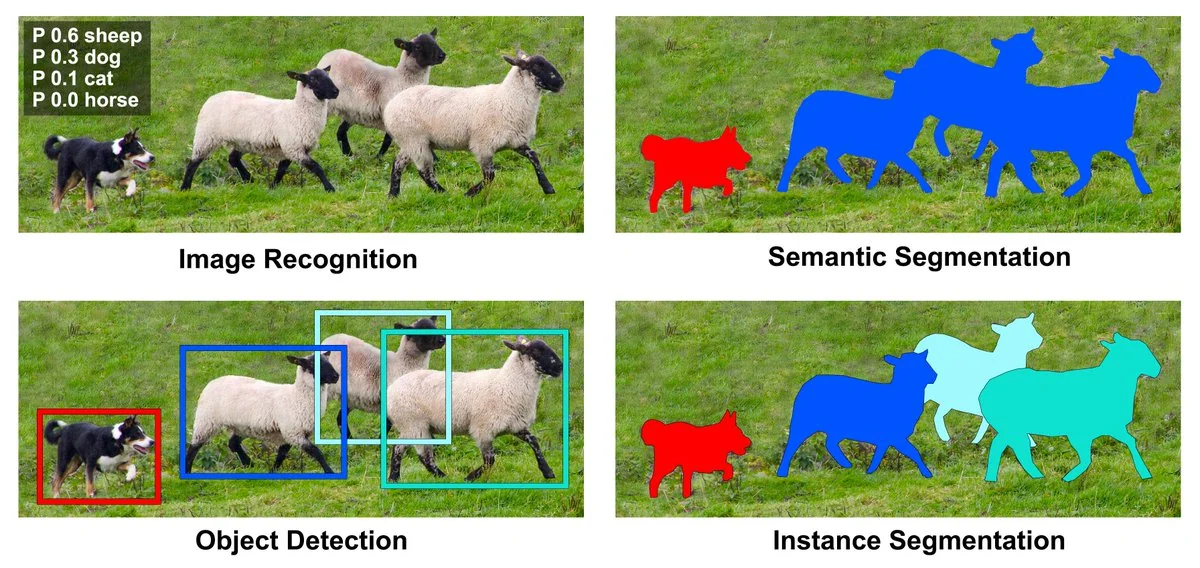

https://keras.io/guides/keras_cv/semantic_segmentation_deeplab_v3_plus/

https://pyimagesearch.com/2022/02/21/u-net-image-segmentation-in-keras/

**Semantic Segmentation** (Семантична сегментація)

Мета: Класифікувати кожен піксель зображення відповідно до його семантичного класу (наприклад, "небо", "дерево", "дорога", "автомобіль").

Характеристики:
- Піксельна класифікація: Кожному пікселю присвоюється мітка класу.
- Не розрізняє екземпляри об'єктів: Всі пікселі, що належать до одного класу, позначені однаково, незалежно від того, чи належать вони до різних екземплярів об'єктів. Наприклад, всі автомобілі на зображенні будуть позначені одним кольором, незалежно від того, скільки їх насправді.

Застосування:
- Автономне водіння: Сегментація дороги, тротуарів, інших автомобілів та пішоходів.
- Медична візуалізація: Сегментація органів, тканин та пухлин на медичних зображеннях.
- Аналіз супутникових знімків: Сегментація різних типів землекористування, таких як ліси, поля та міські райони.

https://cnvrg.io/semantic-segmentation/

<img src="https://cnvrg.io/wp-content/uploads/2021/02/Semantic-Segmentation-Approaches.jpg" width="700">

**Instance Segmentation** (Сегментація екземплярів)

Мета: Класифікувати кожен піксель зображення відповідно до його семантичного класу та розрізнити окремі екземпляри об'єктів одного класу.


Характеристики:
- Піксельна класифікація: Як і в семантичній сегментації, кожному пікселю присвоюється мітка класу.
- Розрізняє екземпляри об'єктів: Кожному екземпляру об'єкта одного класу присвоюється унікальний ідентифікатор. Наприклад, кожен автомобіль на зображенні буде позначений різним кольором.

Застосування:
- Робототехніка: Ідентифікація та відстеження окремих об'єктів для маніпуляцій.
- Роздрібна торгівля: Підрахунок кількості товарів на полицях.
- Спортивна аналітика: Відстеження гравців на полі.

https://www.researchgate.net/publication/355864197_Deep_Learning-Based_Instance_Segmentation_for_Indoor_Fire_Load_Recognition

<img src="https://www.researchgate.net/publication/355864197/figure/fig2/AS:1085873839976456@1635903906479/Architecture-of-Mask-R-CNN-for-instance-segmentation-adapted-from-8-and-27.ppm" width="700">

## One-shot learning

One-shot learning – це задача навчання моделі розпізнавати нові класи об'єктів, маючи лише один приклад кожного класу. Це складна задача, оскільки традиційні алгоритми машинного навчання потребують великої кількості даних для навчання.

<img src="https://serokell.io/files/01/01dzf9uc.A_Guide_to_One-Shot_Learning_pic1.png" width="700">

### Siamese networks

<img src="https://lh5.googleusercontent.com/Zx_x6h6ZKlF8llMN4O1g7ArwkdVZmjsgHE4ydQT2Ke2zqWYNlqAAfsxISg18TjYYGMcHw4Z661eUA4blfUa1lk6vjRInz_NsPD8vrr8WowHyqgIm952N8s2TFfJGO7qk_Exe5VTcFYpYp6Fh5z68bQ" width="700">

https://pyimagesearch.com/2020/11/30/siamese-networks-with-keras-tensorflow-and-deep-learning/

Siamese networks – це архітектура нейронних мереж, яка використовується для One-shot learning. Siamese networks складаються з двох ідентичних мереж, які обробляють два зображення та виводять їх векторні представлення (embeddings). Різниця між цими векторами використовується для визначення, чи належать зображення до одного класу.

**Переваги:**

* **Ефективність для One-shot learning:** Siamese networks здатні вивчати метрику подібності між зображеннями, що дозволяє їм розпізнавати нові класи об'єктів, маючи лише один приклад.
* **Можливість використання для верифікації:** Siamese networks можуть бути використані для верифікації, тобто для визначення, чи належать два зображення одній особі або об'єкту.

**Недоліки:**

* **Складність навчання:** Siamese networks можуть бути складні в навчанні, оскільки потребують спеціальних функцій втрат та методів оптимізації.
* **Обмежена точність для великої кількості класів:**  Точність Siamese networks може знижуватися зі збільшенням кількості класів.




**Triplet Loss:**

Triplet Loss – це функція втрат, яка використовується для навчання Siamese networks.

Triplet Loss мінімізує відстань між векторами представлення зображень одного класу (anchor та positive) та максимізує відстань між векторами представлення зображень різних класів (anchor та negative).



https://pyimagesearch.com/2023/03/06/triplet-loss-with-keras-and-tensorflow/

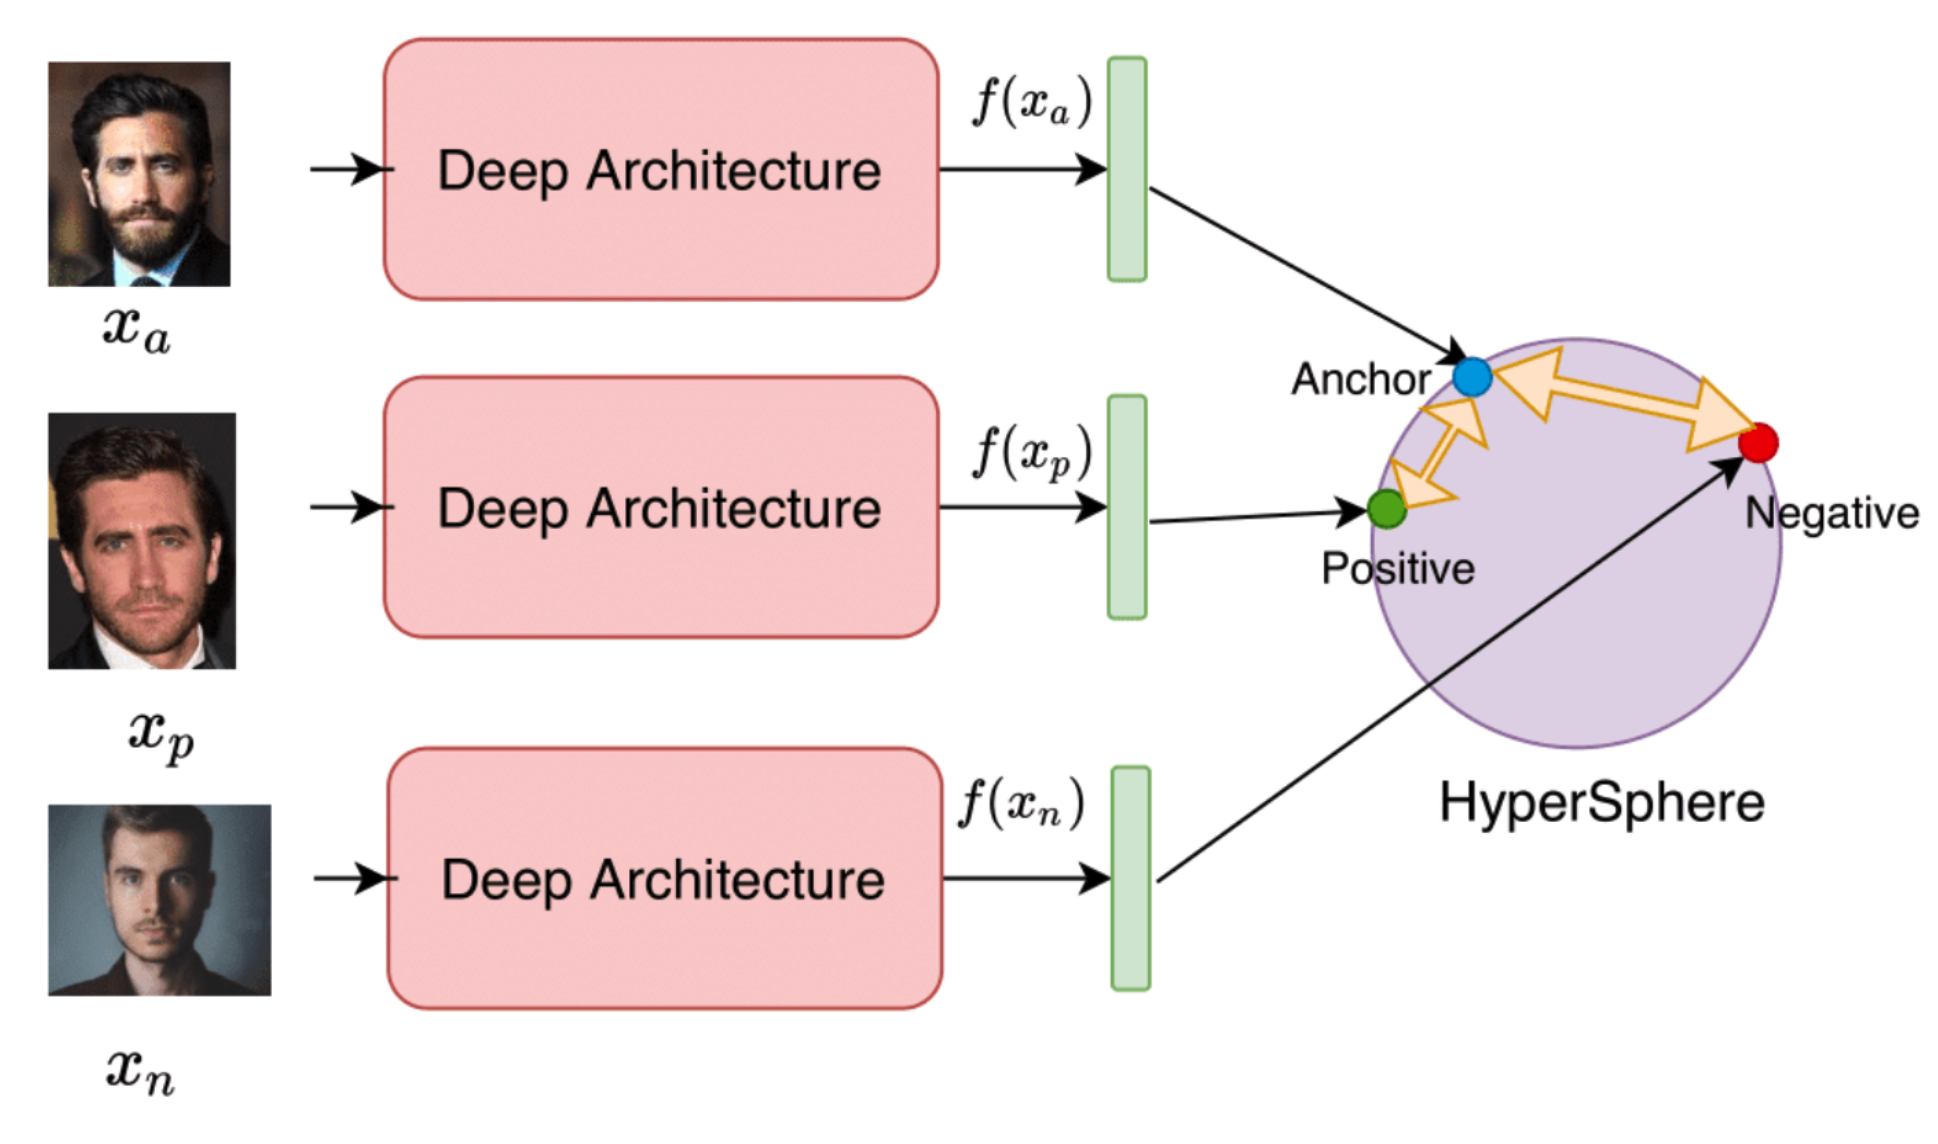

https://medium.com/analytics-vidhya/triplet-loss-b9da35be21b8

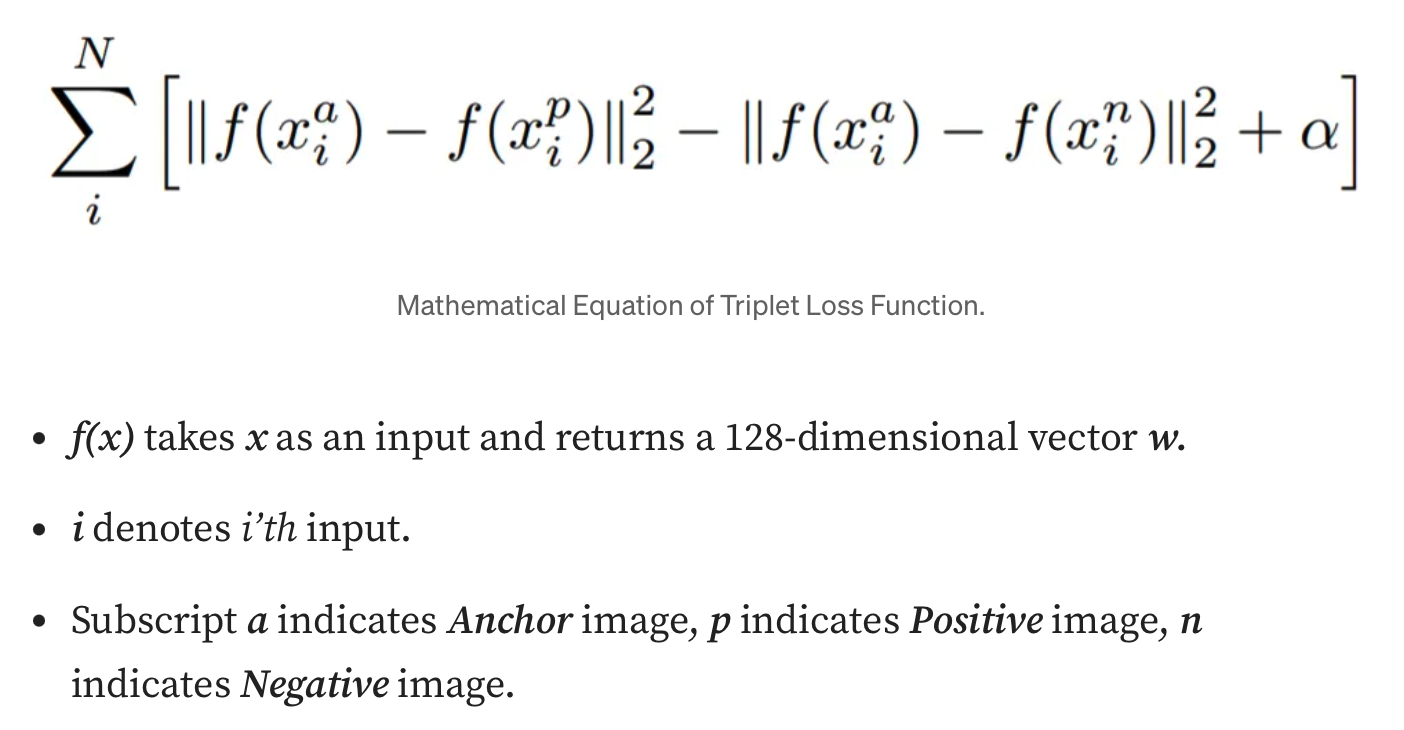

**Переваги:**

* **Ефективність для навчання Siamese networks:** Triplet Loss дозволяє Siamese networks вивчати метрику подібності, яка добре розділяє зображення різних класів.
* **Можливість контролювати margin:** Triplet Loss має параметр margin, який дозволяє контролювати мінімальну відстань між векторами представлення зображень різних класів.

**Недоліки:**

* **Складність вибору триплетів:**  Для навчання з Triplet Loss необхідно ретельно вибирати триплети зображень (anchor, positive, negative), що може бути складним завданням.
* **Повільне навчання:**  Навчання з Triplet Loss може бути повільним, оскільки необхідно обробляти велику кількість триплетів зображень.

## Style transfer

Style Transfer – це задача перенесення художнього стилю одного зображення (style image) на інше (content image).

**Основні принципи роботи алгоритмів Style Transfer:**

Алгоритми Style Transfer використовують згорткові нейронні мережі для виявлення та перенесення стильових ознак зображень. Зазвичай використовуються попередньо навчені мережі, такі як VGG19, для виявлення ознак контенту та стилю на різних шарах мережі.




<img src="https://camo.githubusercontent.com/e36f324ce2f303b88aa7814b5530bb9cbae7db19f60063813d7934833262db34/68747470733a2f2f73746f726167652e676f6f676c65617069732e636f6d2f646f776e6c6f61642e74656e736f72666c6f772e6f72672f6d6f64656c732f74666c6974652f6172626974726172795f7374796c655f7472616e736665722f7461626c652e706e67" width="700">

<img src="https://www.researchgate.net/profile/Francois-Pachet/publication/319524552/figure/fig63/AS:535791153291269@1504753973878/Style-transfer-full-architecture-process.png" width="700">

https://www.tensorflow.org/tutorials/generative/style_transfer

https://dataheadhunters.com/academy/how-to-build-neural-style-transfer-in-python-detailed-steps/

**Приклади:**

* **Перенесення стилю картин на фотографії:**  Можна перенести стиль відомих картин, таких як "Зоряна ніч" Ван Гога, на звичайні фотографії.
* **Створення унікальних художніх фільтрів:**  Style Transfer може бути використаний для створення унікальних художніх фільтрів, які можна застосовувати до зображень.

Style Transfer дозволяє створювати унікальні зображення, які поєднують в собі контент одного зображення та стиль іншого.

**Недоліки:**

* **Обчислювальна складність:**  Алгоритми Style Transfer можуть бути обчислювально складними та потребувати значних ресурсів.
* **Складність налаштування параметрів:**  Для досягнення бажаного результату може знадобитися налаштування параметрів алгоритму, таких як вага контенту та стилю.